In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate a synthetic dataset
np.random.seed(42)
num_samples = 1000
time_steps = 30  # Number of time steps in the sequence
features = 5  # Number of features in the dataset

def generate_synthetic_data():
    data = np.random.rand(num_samples, time_steps, features)
    labels = np.random.randint(2, size=num_samples)  # Binary labels: 0 (no failure) or 1 (failure)
    return data, labels

data, labels = generate_synthetic_data()

# Preprocess the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, features)).reshape(data.shape)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, labels, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(time_steps, features)))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/10
25/25 [==============================] - 2s 26ms/step - loss: 0.6929 - accuracy: 0.5213 - val_loss: 0.6908 - val_accuracy: 0.5350
Epoch 2/10
25/25 [==============================] - 0s 11ms/step - loss: 0.6923 - accuracy: 0.5238 - val_loss: 0.6909 - val_accuracy: 0.5250
Epoch 3/10
25/25 [==============================] - 0s 10ms/step - loss: 0.6917 - accuracy: 0.5213 - val_loss: 0.6904 - val_accuracy: 0.5400
Epoch 4/10
25/25 [==============================] - 0s 10ms/step - loss: 0.6913 - accuracy: 0.5213 - val_loss: 0.6908 - val_accuracy: 0.5300
Epoch 5/10
25/25 [==============================] - 0s 11ms/step - loss: 0.6913 - accuracy: 0.5213 - val_loss: 0.6916 - val_accuracy: 0.5150
Epoch 6/10
25/25 [==============================] - 0s 12ms/step - loss: 0.6908 - accuracy: 0.5238 - val_loss: 0.6913 - val_accuracy: 0.5200
Epoch 7/10
25/25 [==============================] - 0s 12ms/step - loss: 0.6911 - accuracy: 0.5225 - val_loss: 0.6909 - val_accuracy: 0.5250
Epoch 8/10
25

Epoch 1/10
25/25 [==============================] - 0s 15ms/step - loss: 0.6903 - accuracy: 0.5350 - val_loss: 0.6914 - val_accuracy: 0.5100
Epoch 2/10
25/25 [==============================] - 0s 12ms/step - loss: 0.6907 - accuracy: 0.5375 - val_loss: 0.6923 - val_accuracy: 0.5150
Epoch 3/10
25/25 [==============================] - 0s 13ms/step - loss: 0.6891 - accuracy: 0.5462 - val_loss: 0.6909 - val_accuracy: 0.5300
Epoch 4/10
25/25 [==============================] - 0s 11ms/step - loss: 0.6900 - accuracy: 0.5487 - val_loss: 0.6911 - val_accuracy: 0.5300
Epoch 5/10
25/25 [==============================] - 0s 11ms/step - loss: 0.6891 - accuracy: 0.5362 - val_loss: 0.6916 - val_accuracy: 0.5250
Epoch 6/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6882 - accuracy: 0.5612 - val_loss: 0.6924 - val_accuracy: 0.5200
Epoch 7/10
25/25 [==============================] - 0s 12ms/step - loss: 0.6885 - accuracy: 0.5537 - val_loss: 0.6929 - val_accuracy: 0.5100
Epoch 8/10
25/

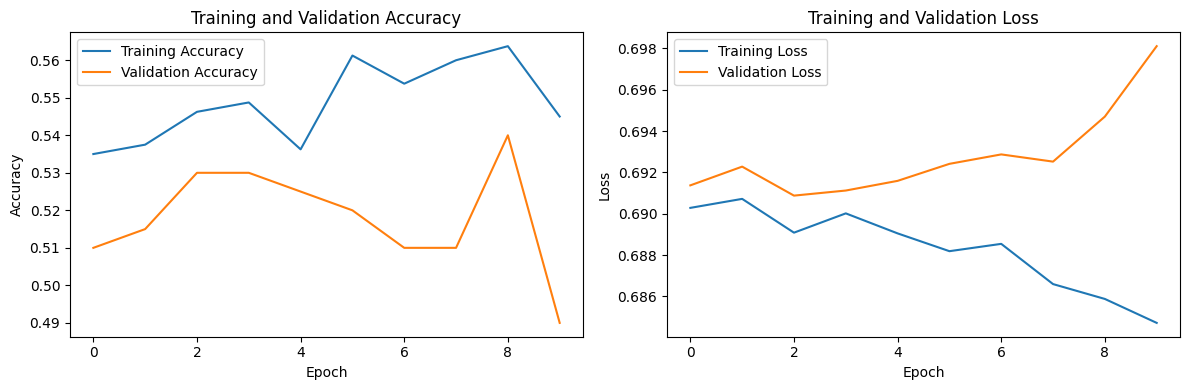

In [2]:
import matplotlib.pyplot as plt

# Train the model and store history for plotting
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
